In [271]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [272]:
kf1 = np.array([ [517.3, 0], [0, 516.5]])   #2*2 Matrix
kf2 = np.array([ [520.9, 0], [0, 521]])     #2*2 Matrix

c1 = np.array([[318.6], [255.3]])     #Column matrix
c2 = np.array([[325.1], [249.7]])     #Column matrix

Rt1 = np.array([ [0.89254, -0.44719, -0.05828 ], [0.4162, 0.86657, -0.27538], [0.17365, 0.22153, 0.95957]]) #3*3 Matrix
t = np.array([[1.2],[0.5], [0.62]])   #3*1 column matrix



In [273]:
z1 = []                   #Load z_1 data 
z2 = []                   #Load z_2 data
with open('z_1.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)

    for line in csv_reader:
        line = [float(i) for i in line]
        z1.append(line)
        
with open('z_2.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)

    for line in csv_reader:
        line = [float(i) for i in line]
        z2.append(line)
    
z1 = np.array(z1)
z2 = np.array(z2)


In [274]:
#we have to predict the correct values of camera 1 reading and camera 2 reading

def predict(mean, sigma, noise_cov):
    
    #noise_cov is Q or W which is basically covariance of noise in state transition equation
    
    mean = mean
    sigma = sigma + noise_cov
    
    return mean, sigma

def kalamn_updates(mean, sigma, jacobian, z, R):
    
    nn = z.shape[0]
    z = z.reshape((nn, 1))
    residual_mean = z - np.matmul(jacobian,mean)           #z is the sensor value, out
    residual_cov = np.matmul(jacobian,sigma)
    residual_cov = np.matmul(residual_cov,jacobian.T)      #R is the covariance of noise in the sensor measurement
    residual_cov += R
    kalman_gain = np.matmul(sigma, jacobian.T)
    kalman_gain = np.matmul(kalman_gain, np.linalg.inv(residual_cov))
    
    mean_updated = mean + np.matmul(kalman_gain,residual_mean)
    sigma_cal = np.matmul(kalman_gain, jacobian)
    sigma_cal = np.matmul(sigma_cal, sigma)
    sigma_updated = sigma - sigma_cal
    
    return mean_updated, sigma_updated

def update_jacobian_z1(px, py, pz, kf):
    
    mul = np.array([[1/pz, 0, -px/(pz**2)], [ 0, 1/pz, -py/(pz**2)]])
    
    jacobian = np.matmul(kf,mul)
    
    return jacobian
    
def update_jacobian_z2(px, py, pz, kf, R):
    
    #Here R is the matrix R which is used to change basis from one frame to another
    
    mul = np.array([[1/pz, 0, -px/(pz**2)], [ 0, 1/pz, -py/(pz**2)]])
    
    mul = np.matmul(kf,mul)
    jacobian = np.matmul(mul,R.T)
    
    return jacobian
    
    

 Final mean: 
 [[1.34474687]
 [1.05112772]
 [0.07345307]]

History of z1: 
 
 [[[389.31970063]
  [297.50987111]]

 [[386.89995117]
  [302.39998761]]

 [[387.77998406]
  [298.83000029]]

 [[391.40999253]
  [299.37000142]]

 [[393.6699957 ]
  [298.48000151]]

 [[387.44999799]
  [300.11000042]]

 [[390.06999845]
  [298.42000066]]

 [[387.23999975]
  [311.84999948]]

 [[389.57999892]
  [292.0800008 ]]

 [[390.63999904]
  [288.64000082]]

 [[385.3499995 ]
  [292.21000036]]

 [[389.80999952]
  [292.44000041]]

 [[391.43999966]
  [295.74000028]]

 [[388.89999979]
  [297.07000015]]

 [[397.07999971]
  [296.82000027]]

 [[385.38999996]
  [300.61999997]]

 [[384.74999997]
  [299.85999998]]

 [[379.69000005]
  [301.66999989]]

 [[392.98999998]
  [306.79999998]]

 [[392.76999995]
  [304.03000002]]]


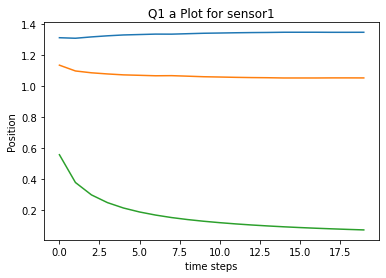

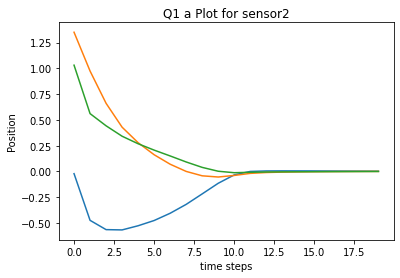

[[ 65.185]
 [412.2  ]]


In [331]:
num_itr = z1.shape[0]
mean = np.array([[1],[1],[1]])
sigma = np.array([[0.1, 0, 0],[0, 0.1, 0], [0, 0, 0.1]])
mean2 = np.array([[1],[1],[1]])
sigma2 = np.array([[0.1, 0, 0],[0, 0.1, 0], [0, 0, 0.1]])
W = np.array([[0.1, 0, 0],[0, 0.1, 0], [0, 0, 0.1]])   #W is the cavariance of the noise in the linearized state transition equation            #  Initial value of z
R = np.array([[0.1, 0],[0, 0.1]])                #  R is the covariance of noise in the sensor measurement
mean_history = []
mean_history2 = []
z1_history = []
z2_history = []
Rt = np.array([[0.1, 0, 0],[0, 0.1, 0], [0, 0, 0.1]])

for i in range(num_itr):
    #For Sensor 1
    #Prediction
    mean, sigma = predict(mean, sigma, W)
    
    jacobian = update_jacobian_z1(mean[0][0], mean[1][0], mean[2][0], kf1)
    
    #Update using sensor data
    mean, sigma = kalamn_updates(mean, sigma, jacobian, z1[i], R)
    
    
    #For Sensor 2
    #Prediction
    mean2, sigma2 = predict(mean2, sigma2, W)
    jacobian2 = update_jacobian_z2(mean2[0][0], mean2[1][0], mean2[2][0], kf2, Rt1)
    
    #Update using sensor data
    mean2, sigma2 = kalamn_updates(mean2, sigma2, jacobian2, z2[i], R)
    
    # mean's history
    mean_history.append(mean)
    mean_history2.append(mean2)
    z1_history.append(np.matmul(jacobian,mean))
    z2_history.append(np.matmul(jacobian2,mean2))
    
print(" Final mean: \n", mean)
    
print('\nHistory of z1: \n \n',np.array(z1_history))

mean_history = np.array(mean_history)
mean_history2 = np.array(mean_history2)
#plot for sensor 1
ll = np.linspace(0,19,20, dtype = np.int32)
plt.plot(ll,mean_history[:,0,0])
plt.plot(ll,mean_history[:,1,0])
plt.plot(ll,mean_history[:,2,0])
plt.xlabel("time steps")
plt.ylabel("Position")
plt.title('Q1 a Plot for sensor1')
plt.show()

#Plot for sensor2
plt.plot(ll,mean_history2[:,0,0])
plt.plot(ll,mean_history2[:,1,0])
plt.plot(ll,mean_history2[:,2,0])
plt.xlabel("time steps")
plt.ylabel("Position")
plt.title('Q1 a Plot for sensor2')
plt.show()

print(np.matmul(jacobian2,mean2))

Final mean [[1.2996079 ]
 [1.12728539]
 [0.07033956]]
----------------------------------
History of z: 
 [[389.32  297.51   53.756 411.49 ]
 [386.9   302.4    43.299 399.49 ]
 [387.78  298.83   75.608 412.79 ]
 [391.41  299.37   48.232 399.04 ]
 [393.67  298.48   67.256 412.62 ]
 [387.45  300.11   66.943 408.79 ]
 [390.07  298.42   88.86  400.36 ]
 [387.24  311.85   65.896 393.84 ]
 [389.58  292.08   61.515 392.06 ]
 [390.64  288.64   68.947 399.79 ]
 [385.35  292.21   69.047 398.11 ]
 [389.81  292.44   67.289 398.41 ]
 [391.44  295.74   60.503 412.33 ]
 [388.9   297.07   54.363 399.52 ]
 [397.08  296.82   69.754 413.93 ]
 [385.39  300.62   53.16  397.18 ]
 [384.75  299.86   56.267 412.22 ]
 [379.69  301.67   79.901 397.27 ]
 [392.99  306.8    62.4   404.26 ]
 [392.77  304.03   65.185 412.2  ]]


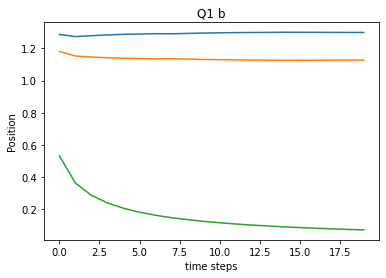

In [308]:
#Implementing a Batch Measurement update using the stacked measurement model Q1b

z12 = np.concatenate((z1,z2), axis=1)
sigma12 = np.array([[0.1, 0, 0],[0, 0.1, 0], [0, 0, 0.1]])
mean12 = np.array([[1],[1],[1]])
R12 = np.array([[0.1, 0, 0, 0],[0, 0.1, 0, 0], [0, 0, 0.1, 0],[0, 0, 0, 0.1]])
mean12_history = []
z12_history = []

for i in range(num_itr):
    
    jacobian = update_jacobian_z1(mean12[0][0], mean12[1][0], mean12[2][0], kf1)

    jacobian2 = update_jacobian_z2(mean12[0][0], mean12[1][0], mean12[2][0], kf2, Rt)
    
    jacobian12 = np.concatenate((jacobian,jacobian2), axis=0)
    
    #Update using sensor data
    mean12, sigma12 = predict(mean12, sigma12, W)
    
    mean12, sigma12 = kalamn_updates(mean12, sigma12, jacobian12, z12[i], R12)
    
    # mean's history for z1
    mean12_history.append(mean12)
    #mean history for z2
    z12_history.append(np.matmul(jacobian12,mean12))
    
#print('z1',np.array(z1_history))

print("Final mean", mean12)
print("----------------------------------")
print("History of z: \n", z12)
mean12_history = np.array(mean12_history)
#Plotting mean vs time step

ll = np.linspace(0,19,20, dtype = np.int32)

#print(mean12_history[:,0,0])

plt.plot(ll,mean12_history[:,0,0])
plt.plot(ll,mean12_history[:,1,0])
plt.plot(ll,mean12_history[:,2,0])
plt.xlabel("time steps")
plt.ylabel("Position")
plt.show()



Implmenting Particle filter

In [277]:
def z_nonlinear(x11, kf, c):
    px1 = x11[0][0]
    py1 = x11[1][0]
    pz1 = x11[2][0]
    point = np.array([[px1/pz1],[py1/pz1]])
    z11 = np.matmul(kf,point) + c
    return z11

def prob_calc(mean, cov, trueval):
    diff = trueval - mean
    calcu = np.matmul(diff.T, np.linalg.inv(cov))
    prob = ( np.linalg.det(cov)*np.exp(-1*np.matmul(calcu, diff)) )
    return prob
    

Value of Px, Py, Pz for camera 1:  0.29788264146324706 0.11986861818967331 2.1081765391102785
Value of z:  [[391.69382662]
 [284.66762655]]
Value of Px, Py, Pz for camera 1:  0.36035494465489404 0.2660120376671241 2.8565158516862246
Value of z:  [[383.85838558]
 [303.3988815 ]]
Value of Px, Py, Pz for camera 1:  0.24562110402702692 0.18558333017932555 1.9669696667385845
Value of z:  [[383.19672422]
 [304.03170728]]
Value of Px, Py, Pz for camera 1:  0.2918032489197201 0.13537869291971708 2.060440183890033
Value of z:  [[391.86095746]
 [289.23599845]]
Value of Px, Py, Pz for camera 1:  0.4436978737914633 0.14398258181289994 3.0284311055748496
Value of z:  [[394.39003851]
 [279.85628043]]
Value of Px, Py, Pz for camera 1:  0.41240950818037836 0.31547358962505206 3.2633766596777485
Value of z:  [[383.97383233]
 [305.23052474]]
Value of Px, Py, Pz for camera 1:  0.5368322654584459 0.35874577224099946 3.7260949731693898
Value of z:  [[393.1293217 ]
 [305.02825242]]
Value of Px, Py, Pz for c

Value of Px, Py, Pz for camera2:  -2.734394283981029 1.7160809937784 5.585978402748915
Value of z:  [[ 70.11405487]
 [409.75758227]]
Value of Px, Py, Pz for camera2:  -2.4265183503522074 1.5314299930411235 5.422155469304573
Value of z:  [[ 91.98728019]
 [396.85089431]]
Value of Px, Py, Pz for camera2:  -2.992372706679533 1.7385297684751504 5.967585324526836
Value of z:  [[ 63.90106305]
 [401.48233073]]
Value of Px, Py, Pz for camera2:  -4.056344390904669 2.160297704362371 7.955372062954424
Value of z:  [[ 59.49962625]
 [391.1786254 ]]
Value of Px, Py, Pz for camera2:  -3.186763422940356 1.911446254452491 6.499554483345835
Value of z:  [[ 69.70017663]
 [402.92027088]]
Value of Px, Py, Pz for camera2:  -3.139274724882572 1.8757923640678524 6.3433354528884704
Value of z:  [[ 67.31003818]
 [403.76529088]]
Value of Px, Py, Pz for camera2:  -3.096810912560655 1.7916889518513834 6.360702108505206
Value of z:  [[ 71.49139252]
 [396.45580274]]
Value of Px, Py, Pz for camera2:  -2.62130179097964

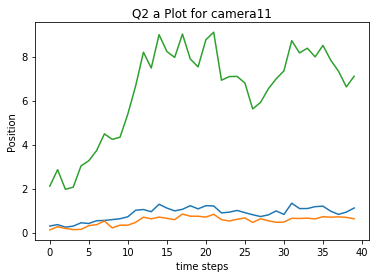

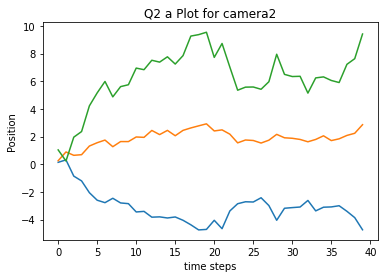

In [327]:
no_itr = 20
x_initial = np.array([[0.5],[0.5],[0.5]])
var = 0.05
N = 500      #we generate N Random Points

var = 0.95
cov = np.array([[1, 0],[0, 1]])
xx_mean = x_initial[0][0]
yy_mean = x_initial[1][0]
zz_mean = x_initial[2][0]

mean_history1 = []
mean_history2 = []

#For sensor 1
for m in range(2):
    for j in range(no_itr):
        #generating random points around the x_initial. The random points will be Gaussian in Nature for simplicity
        weight = []
                
        x = np.random.randn(1, N)
        y = np.random.randn(1, N)
        z = np.random.randn(1, N)
        x =  xx_mean + var*x
        y =  yy_mean + var*y
        z =  zz_mean + var*z
    
        #plt.plot(x,z, '.', markersize=2)
        #plt.axis('equal')
        #plt.show()
        
        z1_calc = z1[j].reshape((2, 1))
        for i in range(N):
            #calculating probability for the weight matrix for given point
        
            x_i = np.array([[x[0,i]], [y[0,i]], [z[0,i]]])
            z1_calc_i = z_nonlinear(x_i, kf1, c1)
            weight_i = prob_calc(z1_calc, cov, z1_calc_i)         #weight_i is the probability 
            weight.append(weight_i[0][0]) 
    
        index = np.argmax(weight)
        xx_mean = x[0,index]
        yy_mean = y[0,index]
        zz_mean = z[0,index]
        print("Value of Px, Py, Pz for camera 1: ",xx_mean,yy_mean,zz_mean)
    
        x_i_try = np.array([[x[0,index]], [y[0,index]], [z[0,index]]])
        z1_calc_i = z_nonlinear(x_i_try, kf1, c1)
        print("Value of z: ", z1_calc_i)                                   #printing the value of z
        
        mean_history1.append(x_i_try)
    
 #For sensor 2 or camera 2

xx_mean2 = x_initial[0][0]
yy_mean2 = x_initial[1][0]
zz_mean2 = x_initial[2][0]

for m in range(2):
    for j in range(no_itr):
        #generating random points around the x_initial. The random points will be Gaussian in Nature for simplicity
        weight2 = []
                
        x = np.random.randn(1, N)
        y = np.random.randn(1, N)
        z = np.random.randn(1, N)
        x =  xx_mean2 + var*x
        y =  yy_mean2 + var*y
        z =  zz_mean2 + var*z
    
        #plt.plot(x,z, '.', markersize=2)
        #plt.axis('equal')
        #plt.show()
        z2_calc = z2[j].reshape((2, 1))
        for i in range(N):
            #calculating probability for the weight matrix for given point
        
            x_i = np.array([[x[0,i]], [y[0,i]], [z[0,i]]])
            z2_calc_i = z_nonlinear(x_i, kf2, c2)
            weight_i = prob_calc(z2_calc, cov, z2_calc_i)         #weight_i is the probability 
            weight2.append(weight_i[0][0]) 
    
        index = np.argmax(weight2)
        xx_mean2 = x[0,index]
        yy_mean2 = y[0,index]
        zz_mean2 = z[0,index]
        print("Value of Px, Py, Pz for camera2: ",xx_mean2,yy_mean2,zz_mean2)
    
        x_i_try = np.array([[x[0,index]], [y[0,index]], [z[0,index]]])
        z1_calc_i = z_nonlinear(x_i_try, kf2, c2)
        print("Value of z: ", z1_calc_i)  
        mean_history2.append(x_i_try)


mean_history1 = np.array(mean_history1)
mean_history2 = np.array(mean_history2)
#plot for sensor 1
ll = np.linspace(0,39,40, dtype = np.int32)
plt.plot(ll,mean_history1[:,0,0])
plt.plot(ll,mean_history1[:,1,0])
plt.plot(ll,mean_history1[:,2,0])
plt.xlabel("time steps")
plt.ylabel("Position")
plt.title('Q2 a Plot for camera11')
plt.show()

#Plot for sensor2
plt.plot(ll,mean_history2[:,0,0])
plt.plot(ll,mean_history2[:,1,0])
plt.plot(ll,mean_history2[:,2,0])
plt.xlabel("time steps")
plt.ylabel("Position")
plt.title('Q2 a Plot for camera2')
plt.show()


shape (20, 4)
Value of Px, Py, Pz:  1.1161934089718715 0.6250094796350865 7.105892959707605
Value of z:  [[471.94196575]
 [451.40262372]]
shape (20, 4)
Value of Px, Py, Pz:  1.1161934089718715 0.6250094796350865 7.105892959707605
Value of z:  [[384.10733303]
 [297.67708033]]
shape (20, 4)
Value of Px, Py, Pz:  1.1161934089718715 0.6250094796350865 7.105892959707605
Value of z:  [[390.58926557]
 [300.27247778]]
shape (20, 4)
Value of Px, Py, Pz:  1.1161934089718715 0.6250094796350865 7.105892959707605
Value of z:  [[378.06661184]
 [300.07473556]]
shape (20, 4)
Value of Px, Py, Pz:  1.1161934089718715 0.6250094796350865 7.105892959707605
Value of z:  [[391.18976111]
 [294.92811548]]
shape (20, 4)
Value of Px, Py, Pz:  1.1161934089718715 0.6250094796350865 7.105892959707605
Value of z:  [[389.33121096]
 [295.61994683]]
shape (20, 4)
Value of Px, Py, Pz:  1.1161934089718715 0.6250094796350865 7.105892959707605
Value of z:  [[378.54210744]
 [311.3797971 ]]
shape (20, 4)
Value of Px, Py, Pz:

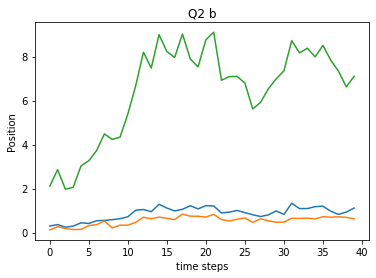

In [329]:
#Q2 b Batched Measeurement updates using the stacked measurement model

no_itr = 5
x_initial = np.array([[0.5],[0.5],[0.5]])
var = 0.05
N = 500      #we generate N Random Points
z12 = np.concatenate((z1,z2), axis=1)

var = 0.95
cov = np.array([[1, 0],[0, 1]])
xx_mean12 = x_initial[0][0]
yy_mean12 = x_initial[1][0]
zz_mean12 = x_initial[2][0]

mean_history = []

for m in range(no_itr):
    for j in range(no_itr):
        #generating random points around the x_initial. The random points will be Gaussian in Nature for simplicity
        weight = []
                
        x = np.random.randn(1, N)
        y = np.random.randn(1, N)
        z = np.random.randn(1, N)
        x =  xx_mean12 + var*x
        y =  yy_mean12 + var*y
        z =  zz_mean12 + var*z
    
        #plt.plot(x,z, '.', markersize=2)
        #plt.axis('equal')
        #plt.show()
        z1_calc = z1[j].reshape((2, 1))
        z2_calc = z2[j].reshape((2, 1))
        print("shape", z12.shape)
        for i in range(N):
            #calculating probability for the weight matrix for given point
        
            x_i = np.array([[x[0,i]], [y[0,i]], [z[0,i]]])
            z1_calc_i = z_nonlinear(x_i, kf1, c1)
            z2_calc_i = z_nonlinear(x_i, kf2, c2)
            weight_i = prob_calc(z1_calc, cov, z1_calc_i) 
            weight_i2 = prob_calc(z2_calc, cov, z2_calc_i)        #weight_i is the probability
            
            
            weight.append(weight_i[0][0]) 
    
        index = np.argmax(weight)
        xx_mean12 = x[0,index]
        yy_mean12 = y[0,index]
        zz_mean12 = z[0,index]
        print("Value of Px, Py, Pz: ",xx_mean,yy_mean,zz_mean)
    
        x_i_try = np.array([[x[0,index]], [y[0,index]], [z[0,index]]])
        z1_calc_i = z_nonlinear(x_i_try, kf1, c1)
        print("Value of z: ", z1_calc_i)                                   #printing the value of z
        mean_history.append(x_i_try)
        
mean_history = np.array(mean_history)
#plots

ll = np.linspace(0,39,40, dtype = np.int32)
plt.plot(ll,mean_history1[:,0,0])
plt.plot(ll,mean_history1[:,1,0])
plt.plot(ll,mean_history1[:,2,0])
plt.xlabel("time steps")
plt.ylabel("Position")
plt.title('Q2 b')
plt.show()
        